<a href="https://colab.research.google.com/github/starkjones/Neural-Networks/blob/main/Neural_Network_Kaggle_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Kaggle Exercise**
Jonathan Jones

22.06.09

In [1]:
# Libraries: 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [2]:
# Mount google drive:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load training data:

data = '/content/drive/MyDrive/SI/Kaggle/train.csv'

df = pd.read_csv(data)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Load test data:

test_data = '/content/drive/MyDrive/SI/Kaggle/test.csv'

df_test = pd.read_csv(test_data)

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# convert column names to lower case:

df.columns = df.columns.str.lower()

df_test.columns = df_test.columns.str.lower()

In [6]:
# Duplicated rows:

df.duplicated().sum()

0

In [7]:
# Datatypes and dictionary conformity: 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [8]:
# Removing columns with less than 50% of their data: 

df.dropna(axis = 1, thresh = 45, inplace = True)

df_test.dropna(axis = 1, thresh = 45, inplace = True)

# cat = make_column_selector(dtype_include= 'object')

# cat(df)

In [9]:
# Removal of ineffectual columns:

dropped_columns = ['alley', 'miscfeature', 'masvnrtype', 'masvnrarea', 
                   'fireplacequ', 'bsmtfintype1', 'bsmtfintype2', 'garagequal', 
                   'garagecond','fence', 'bsmtqual', 'bsmtcond']

df.drop(columns = dropped_columns, inplace = True)
df_test.drop(columns = dropped_columns, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   lotshape       1460 non-null   object 
 7   landcontour    1460 non-null   object 
 8   utilities      1460 non-null   object 
 9   lotconfig      1460 non-null   object 
 10  landslope      1460 non-null   object 
 11  neighborhood   1460 non-null   object 
 12  condition1     1460 non-null   object 
 13  condition2     1460 non-null   object 
 14  bldgtype       1460 non-null   object 
 15  housestyle     1460 non-null   object 
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

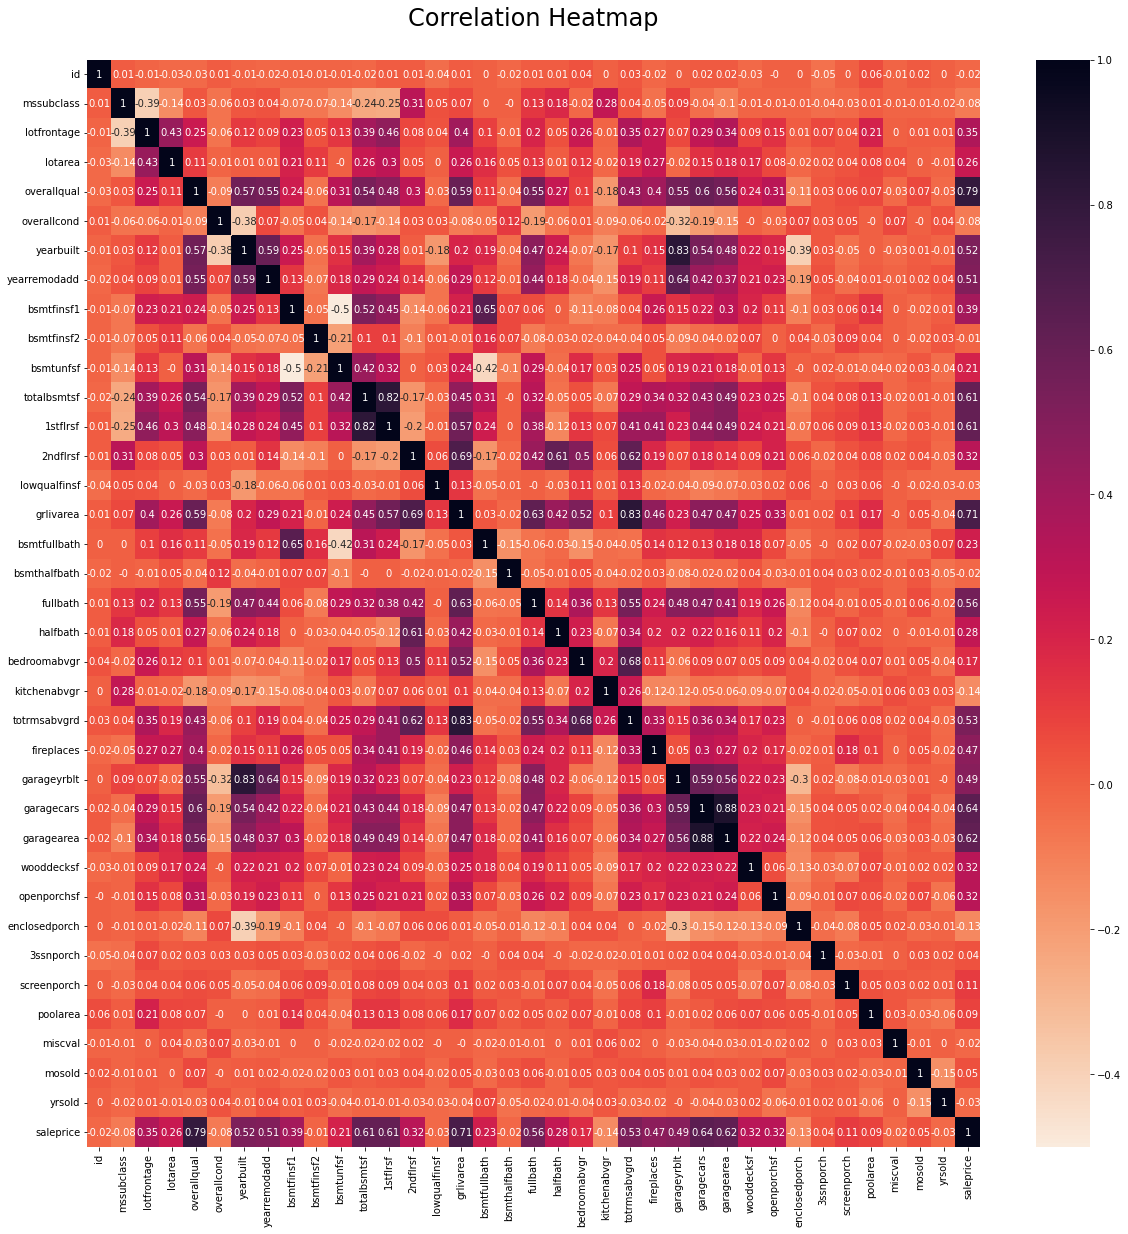

In [11]:
import seaborn as sns

# Heat map to see which features are correlated with our target outcome:

correlation = df.corr().round(2)

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(20,20));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

In [12]:
# Finding the features that have the strongest correlation with our target:

correlated_features = df[df.columns[1:]].corr()['saleprice'][:]
correlated_features.round(2).sort_values(ascending = False)
# new_df = []

# for feature in new_df:
#   if feature > 0.5:
#     new_df.append(feature)
#   else:
#     'ignore'

saleprice        1.00
overallqual      0.79
grlivarea        0.71
garagecars       0.64
garagearea       0.62
totalbsmtsf      0.61
1stflrsf         0.61
fullbath         0.56
totrmsabvgrd     0.53
yearbuilt        0.52
yearremodadd     0.51
garageyrblt      0.49
fireplaces       0.47
bsmtfinsf1       0.39
lotfrontage      0.35
wooddecksf       0.32
2ndflrsf         0.32
openporchsf      0.32
halfbath         0.28
lotarea          0.26
bsmtfullbath     0.23
bsmtunfsf        0.21
bedroomabvgr     0.17
screenporch      0.11
poolarea         0.09
mosold           0.05
3ssnporch        0.04
bsmtfinsf2      -0.01
bsmthalfbath    -0.02
miscval         -0.02
lowqualfinsf    -0.03
yrsold          -0.03
overallcond     -0.08
mssubclass      -0.08
enclosedporch   -0.13
kitchenabvgr    -0.14
Name: saleprice, dtype: float64

In [13]:
# New data frame with features that are strongly correlated to our target (.3 correlation value or better)

train = df[['saleprice','overallqual',
'grlivarea',
'garagecars',
'garagearea',
'totalbsmtsf',
'1stflrsf',
'fullbath',
'totrmsabvgrd',
'yearbuilt',
'yearremodadd',
'garageyrblt',
'fireplaces']]

train.head()

,saleprice,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd,garageyrblt,fireplaces
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,0
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,1
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,1
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,1


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   saleprice     1460 non-null   int64  
 1   overallqual   1460 non-null   int64  
 2   grlivarea     1460 non-null   int64  
 3   garagecars    1460 non-null   int64  
 4   garagearea    1460 non-null   int64  
 5   totalbsmtsf   1460 non-null   int64  
 6   1stflrsf      1460 non-null   int64  
 7   fullbath      1460 non-null   int64  
 8   totrmsabvgrd  1460 non-null   int64  
 9   yearbuilt     1460 non-null   int64  
 10  yearremodadd  1460 non-null   int64  
 11  garageyrblt   1379 non-null   float64
 12  fireplaces    1460 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 148.4 KB


In [15]:
test = df_test[['overallqual',
'grlivarea',
'garagecars',
'garagearea',
'totalbsmtsf',
'1stflrsf',
'fullbath',
'totrmsabvgrd',
'yearbuilt',
'yearremodadd',
'garageyrblt',
'fireplaces']]

test.isna().sum()

overallqual      0
grlivarea        0
garagecars       1
garagearea       1
totalbsmtsf      1
1stflrsf         0
fullbath         0
totrmsabvgrd     0
yearbuilt        0
yearremodadd     0
garageyrblt     78
fireplaces       0
dtype: int64

## **Preprocessing**

In [16]:
# Set target:

X = train.drop(columns = 'saleprice')
y = train['saleprice']

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
from sklearn.pipeline import make_pipeline
from pandas.core.arrays import categorical
from sklearn.compose import make_column_selector, make_column_transformer

# Column selection / separation by data type:
# All columns are numeric:

num_selector = make_column_selector(dtype_include= 'number')

numeric_columns = num_selector(X_train)

In [18]:
# Instantiate Scaler:
scaler = StandardScaler()

# Instantiate imputers:
mean_imputer = SimpleImputer(strategy= 'mean')

# Pipelines:
numeric_pipleine = make_pipeline(mean_imputer, scaler)

In [19]:
# Preprocessing tuples:
numeric_tuple = (numeric_pipleine, numeric_columns)

# Column transformer:
preprocessor = make_column_transformer(numeric_tuple, remainder= 'passthrough')

# Data processing:

preprocessor.fit(X_train, y_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## **XGBoost Modeling**

In [20]:
# Import Libraries:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Construct a function that prints all 4 metrics:

def evaluate_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae.round(2)},\n MSE {mse.round(2)},\n RMSE: {rmse.round(2)},\n R^2: {r2.round(2)} ')

In [22]:
from xgboost import XGBClassifier

# Instantiate Gradient Boosting Model:

xgb = XGBClassifier()

# Fit model on training data:

xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [23]:
# Preprocessed testing data:

transformed_test = preprocessor.transform(test)

In [24]:
# Test predictions

xgb_test_predictions = xgb.predict(transformed_test)

In [25]:
xgb_test_predictions

array([109500, 157900, 173000, ..., 142000,  84500, 219500])

In [26]:
# Model Evaluation:

xgbpredict = xgb.predict(X_test)

xgb_eval = evaluate_model(y_test, xgbpredict)

MAE 28826.29,
 MSE 2472959512.34,
 RMSE: 49728.86,
 R^2: 0.65 


In [27]:
# Data Frame of XGBoost test predictions:

xgb_pred_df = pd.DataFrame({'Id': df_test['id'], 'SalePrice' : xgb_test_predictions})

xgb_pred_df.head()

,Id,SalePrice
0,1461,109500
1,1462,157900
2,1463,173000
3,1464,176500
4,1465,179200


In [28]:
# Output file:

xgb_pred_df.to_csv('/content/drive/MyDrive/SI/Kaggle/xgboost_submission.csv', index = False)

## **Neural Network Modeling**

In [29]:
# Import Libraries:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import metrics
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Learning history plotting function:

def plot_history(history):
  """Plots the metrics of a model's learning progression or history"""

  metrics = history.history.keys()

  for metric in metrics:
    if not 'val' in metric:
      plt.plot(history.history[f'{metric}'], label = f'{metric}')
      if f'val_{metric}' in metrics:
        plt.plot(history.history[f'val_{metric}'], label = f'val_{metric}')
        plt.title(f'{metric}')
        plt.show()

In [31]:
inputshape = X_train.shape[1]
inputshape

# Model instantiation:
sm = Sequential()

# First hidden layer: 
sm.add(Dense(11, activation = 'relu', input_dim = inputshape))

# Second:
sm.add(Dense(9, activation = 'relu'))

# Third:
sm.add(Dense(6, activation = 'relu'))

# Output layer:
sm.add(Dense(1, activation = 'linear'))

# Network Summary:
sm.summary()

# Compile model:
sm.compile(optimizer= 'adam', loss = 'mse', metrics= 'mae')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                143       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 318
Trainable params: 318
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Model fit:

history = sm.fit(X_train, y_train, 
                 validation_data = (X_test, y_test),
                 epochs = 250,
                 verbose = 0)

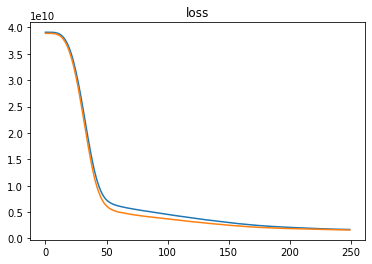

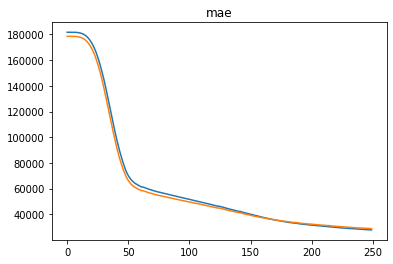

In [33]:
# Plot history for model 3:

plot_history(history)

In [34]:
# Model Evaluation:

nnpredict = sm.predict(X_test)

nn_eval = evaluate_model(y_test, nnpredict)

MAE 28875.87,
 MSE 1611333228.16,
 RMSE: 40141.42,
 R^2: 0.77 


In [35]:
# Model Evaluation:

# Predictions and model evaluation:
nn_test_predicitions = sm.predict(transformed_test)

nn_test_predictions = nn_test_predicitions.round().astype(bool)

In [36]:
# Data Frame of Sequencial test predictions:


nn_pred_df = pd.DataFrame(nn_test_predicitions, columns= ['SalePrice'])
                          
nn_pred_df['Id'] = df_test['id']

nn_pred_df.head()

,SalePrice,Id
0,113540.007812,1461
1,113178.195312,1462
2,179646.750000,1463
3,192033.656250,1464
4,179836.156250,1465


In [37]:
# Column swap for submission compliance (Id must be first);

colname = list(nn_pred_df.columns)

colname[1], colname[0] = colname[0], colname[1]
colname

nn_pred_df = nn_pred_df[colname]

nn_pred_df.head()

,Id,SalePrice
0,1461,113540.007812
1,1462,113178.195312
2,1463,179646.750000
3,1464,192033.656250
4,1465,179836.156250


In [38]:
# Output file:

nn_pred_df.to_csv('/content/drive/MyDrive/SI/Kaggle/neuralnetworkSequential_submission2.csv', index = False)

## **Model Comparison**

**XGBoost:**          

 MAE 28826.29,

 MSE 2472959512.34

 RMSE: 49728.86

 R^2: 0.65 

**Neural Network Sequencial:**

 MAE 23826.67

 MSE 1284091557.81

 RMSE: 35834.22

 R^2: 0.82 

The Neural Network model minimized error significantly. 
The Mean Absolute Error has been reduced by 17% to 23,826.67 dollars. 

**Screen shot of Kaggle Submissions:**


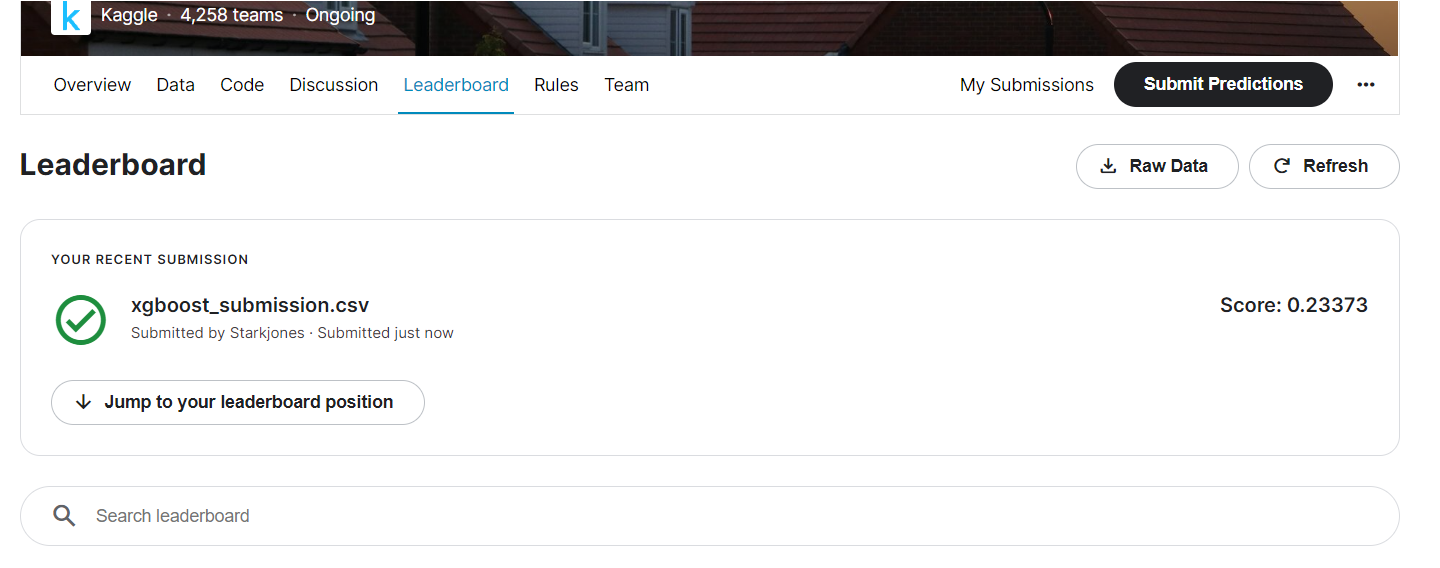

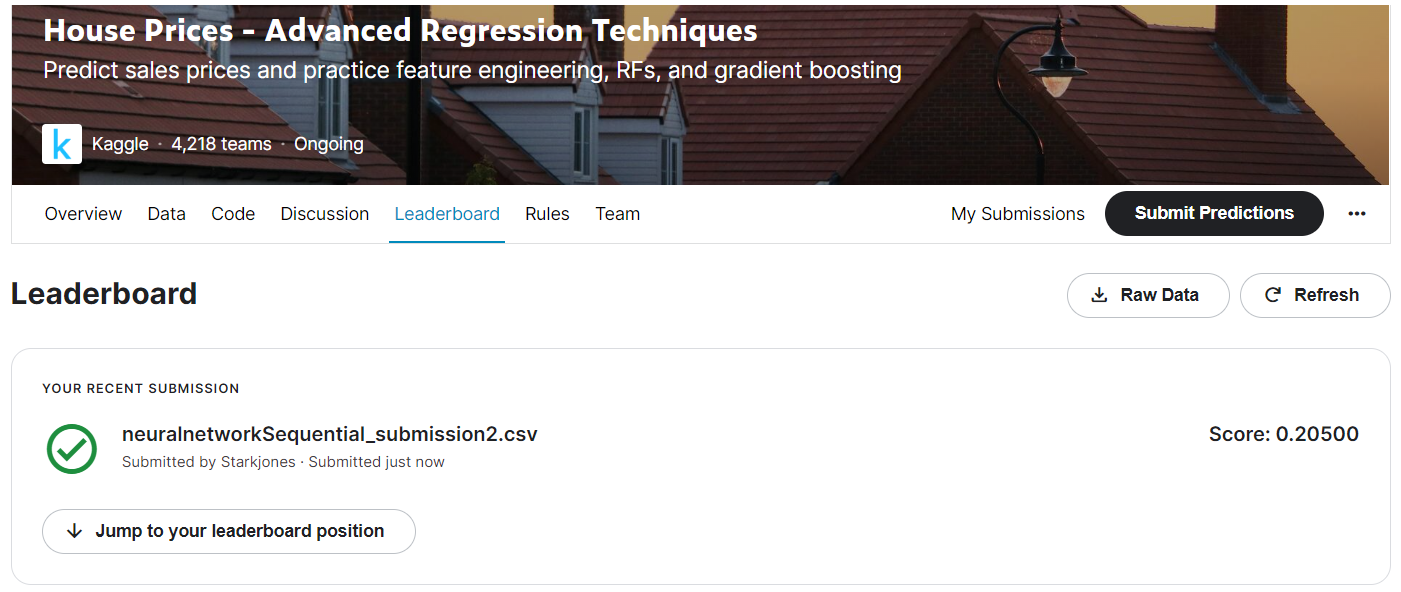